## __2. PHÂN TÍCH DOANH THU DOANH NGHIỆP__

- Phân tích doanh thu theo thời gian (ngày, giờ, ngày trong tuần)
- Phân tích doanh thu thực tế và doanh thu dự kiến
- Phân tích doanh thu theo quận/ huyện, khách hàng nam hay nữ
- Doanh thu theo nghề nghiệp, ngành, theo nhóm khách hàng
- Phân tích doanh thu theo từng thể loại phim, quốc gia phim
- Phân tích doanh thu từ các dịch vụ phụ

Trước khi tiến hành vào phân tích doanh thu, trong tháng 5 này, rạp chiếu phim ghi nhận 

In [ ]:
# Tạo bảng để bỏ duplicated customerid
# Bước 1: Loại bỏ trùng theo orderid trước
df_unique = df_final.drop_duplicates(subset='orderid').reset_index(drop=True)
print(df_unique)

                orderid cashier   saledate   total       customerid  \
0      10006052019B0225  emp002 2019-05-06   90000       0000000014   
1      10022052019B0167  emp011 2019-05-22   90000       0000000034   
2      10130052019B0141  emp005 2019-05-30   90000       0000000034   
3      10105052019B0147  emp011 2019-05-05   90000       0000000081   
4      10105052019B0145  emp011 2019-05-05   90000       0000000081   
...                 ...     ...        ...     ...              ...   
13963   9925052019B0016  emp015 2019-05-25  135000        KH9958204   
13964  10009052019B0331  emp008 2019-05-09   90000  WEBS00000043900   
13965  10009052019B0332  emp008 2019-05-09   90000  WEBS00000043900   
13966  10130052019B0192  emp005 2019-05-30  180000  WEBS00000044909   
13967  12508052019B0036  emp007 2019-05-08   90000  WEBS00000046015   

       ticketcode        date                time slot  room  ... rating  \
0        20074925  2019-05-06 1900-01-01 18:15:00  G04     3  ...  PG-1

### __DOANH THU THEO THỜI GIAN__

##### __DOANH THU THEO NGÀY CỦA THÁNG 5/2019__

In [ ]:
# Tính total theo ngày trong tháng 5
daily_revenue = df_unique.groupby(df_final['saledate'].dt.day)['total'].sum().reset_index()
daily_revenue.columns = ['Ngày', 'Tổng Doanh Thu']
print(daily_revenue)

    Ngày  Tổng Doanh Thu
0      1         8280000
1      2        52685000
2      3         5625000
3      5        97855000
4      6        64425000
5      7        54305000
6      8        67975000
7      9        67725000
8     10        65035000
9     11       105820000
10    12        74010000
11    13        38850000
12    14        38310000
13    15        39405000
14    16        41900000
15    17        45830000
16    18        42235000
17    19        51820000
18    20        38265000
19    21        29835000
20    22        26575000
21    23        37240000
22    24        69235000
23    25        84385000
24    26        78410000
25    27        50080000
26    28        50670000
27    29        43260000
28    30        66640000
29    31        77605000


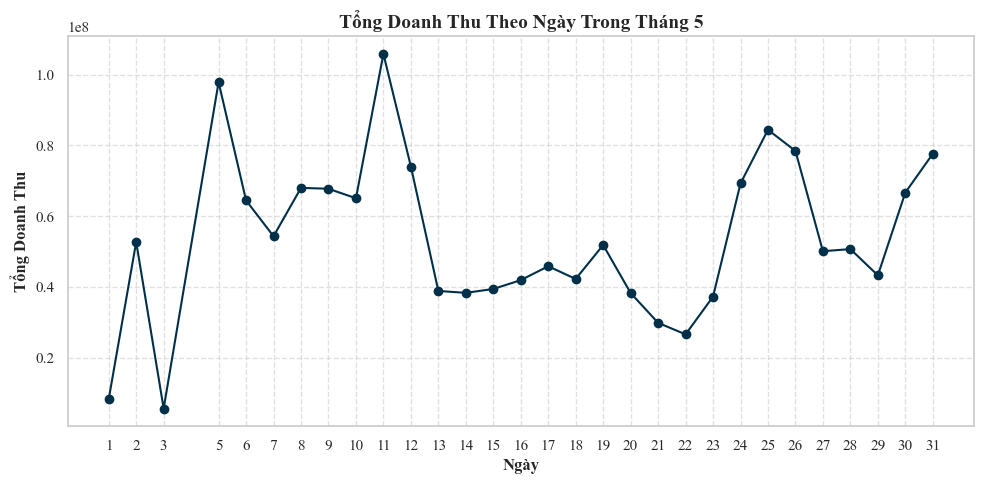

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(daily_revenue['Ngày'], daily_revenue['Tổng Doanh Thu'], marker='o', color='#003049')
plt.title('Tổng Doanh Thu Theo Ngày Trong Tháng 5', fontsize=14, fontweight='bold')
plt.xlabel('Ngày', fontsize=12, fontweight='bold')
plt.ylabel('Tổng Doanh Thu', fontsize=12, fontweight='bold')
plt.xticks(daily_revenue['Ngày'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Tính doanh thu theo thời điểm trong ngày
# Tính doanh thu theo thời điểm trong ngày
revenue_by_time = df_unique.groupby('Time of day')['total'].sum().reindex(['Sáng', 'Chiều', 'Tối', 'Đêm'])
print(revenue_by_time)

Time of day
Sáng     188020000
Chiều    497395000
Tối      742210000
Đêm      186665000
Name: total, dtype: int64


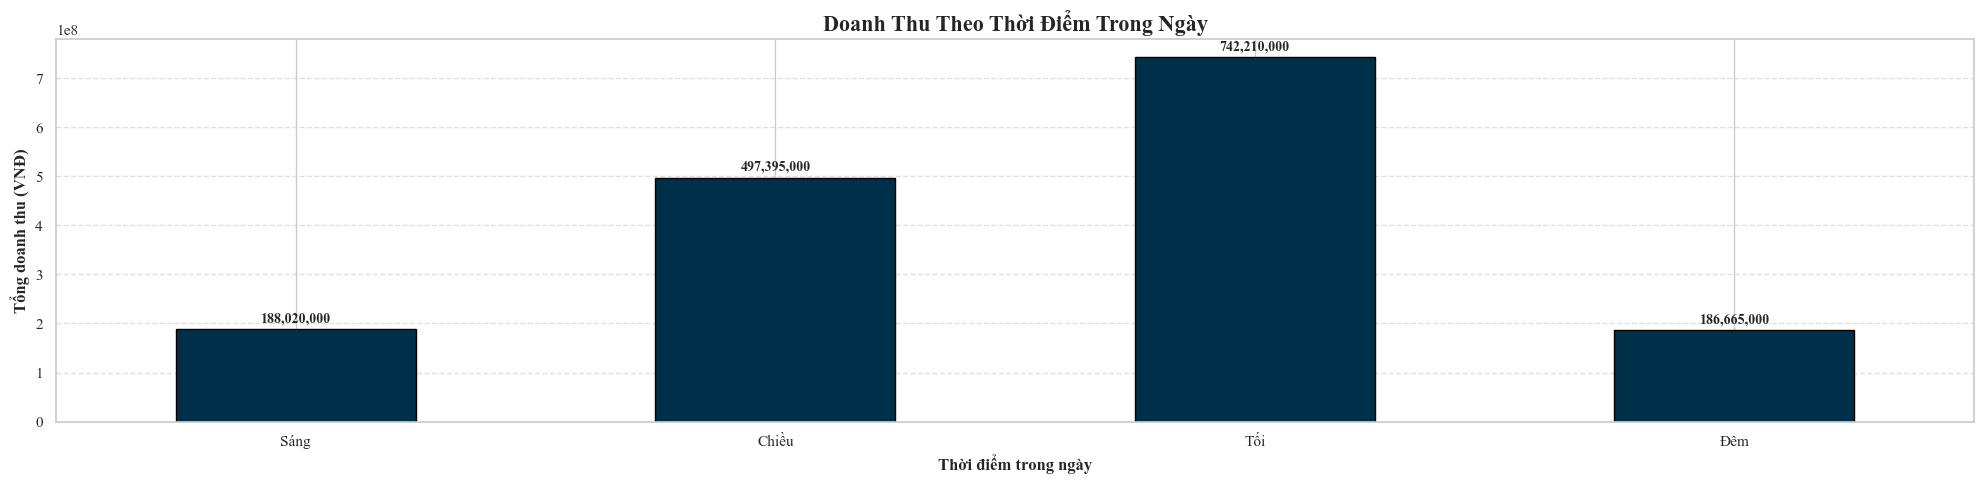

In [ ]:
# Vẽ biểu đồ cột
plt.figure(figsize=(20, 5))
revenue_by_time.plot(kind='bar', color='#003049', edgecolor='black')

# Tùy chỉnh biểu đồ
plt.title('Doanh Thu Theo Thời Điểm Trong Ngày', fontsize=16, fontweight='bold')
plt.xlabel('Thời điểm trong ngày', fontsize=12, fontweight='bold')
plt.ylabel('Tổng doanh thu (VNĐ)', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)

# Thêm nhãn số trên đầu cột
for i, v in enumerate(revenue_by_time):
    plt.text(i, v + revenue_by_time.max()*0.01, f"{int(v):,}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

##### __DOANH THU THEO GIỜ TRONG NGÀY__

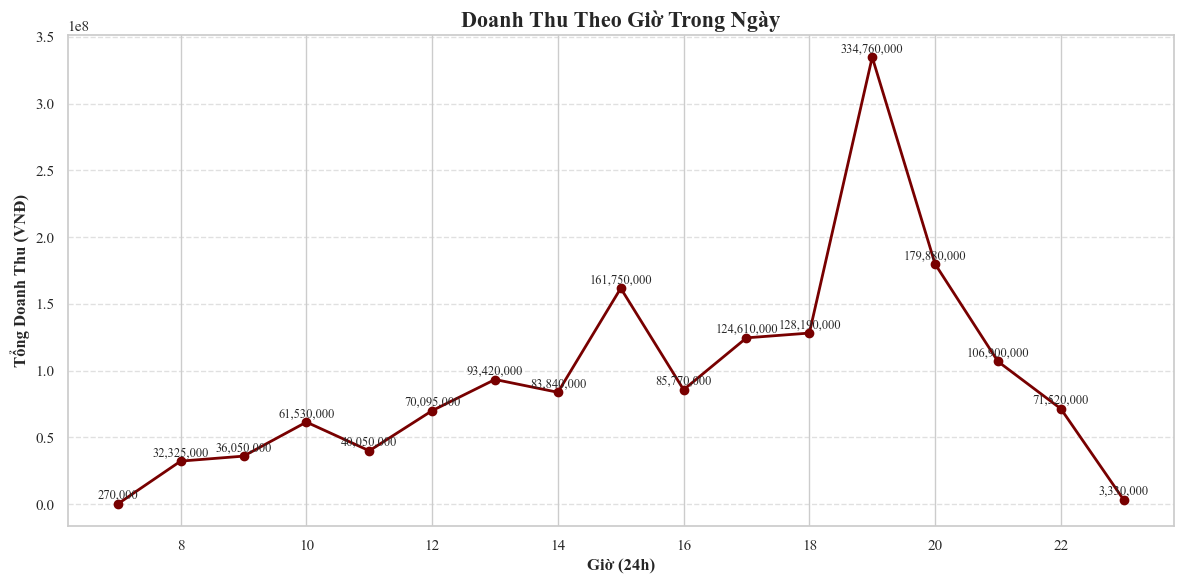

In [ ]:
# Lấy giờ và tính doanh thu theo giờ
df_unique['time'] = pd.to_datetime(df_final['time'], errors='coerce')
df_unique['hour'] = df_unique['time'].dt.hour

# Tính doanh thu theo giờ
revenue_by_hour = df_unique.groupby('hour')['total'].sum()

# Vẽ biểu đồ đường
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(revenue_by_hour.index, revenue_by_hour.values, marker='o', color='#780000', linewidth=2, markersize=6)

# Tiêu đề và nhãn
plt.title('Doanh Thu Theo Giờ Trong Ngày', fontsize=16, fontweight='bold')
plt.xlabel('Giờ (24h)', fontsize=12, fontweight='bold')
plt.ylabel('Tổng Doanh Thu (VNĐ)', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Gắn nhãn trên từng điểm
for i, v in enumerate(revenue_by_hour):
    plt.text(revenue_by_hour.index[i], v + revenue_by_hour.max()*0.01, f"{int(v):,}", ha='center', fontsize=9)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### __DOANH THU THEO NGÀY TRONG TUẦN__

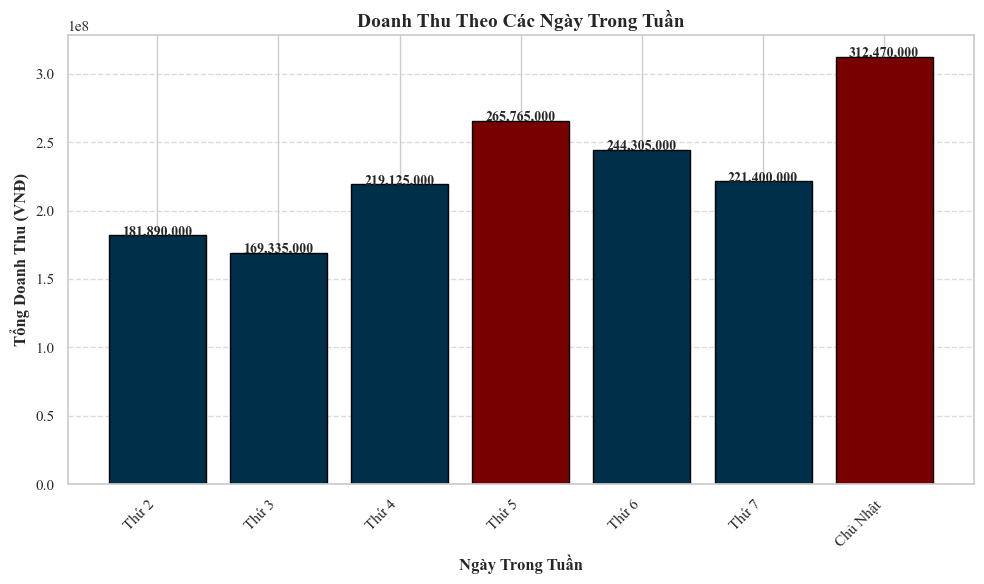

In [ ]:
import matplotlib.pyplot as plt

# Ánh xạ từ tiếng Anh sang tiếng Việt
weekday_mapping = {
    'Monday': 'Thứ 2',
    'Tuesday': 'Thứ 3',
    'Wednesday': 'Thứ 4',
    'Thursday': 'Thứ 5',
    'Friday': 'Thứ 6',
    'Saturday': 'Thứ 7',
    'Sunday': 'Chủ Nhật'
}

# Ánh xạ lại các giá trị trong cột Weekday
df_unique['Weekday'] = df_unique['Weekday'].map(weekday_mapping)

# Tạo danh sách các ngày trong tuần theo thứ tự
weekdays_order = ['Thứ 2', 'Thứ 3', 'Thứ 4', 'Thứ 5', 'Thứ 6', 'Thứ 7', 'Chủ Nhật']

# Tính tổng doanh thu theo ngày trong tuần
revenue_by_day = df_unique.groupby('Weekday')['total'].sum()

# Sắp xếp lại theo thứ tự các ngày trong tuần và thay NaN bằng 0 nếu thiếu ngày
revenue_by_day = revenue_by_day.reindex(weekdays_order).fillna(0)

# Tạo danh sách màu sắc: mặc định xanh đậm, riêng Thứ 5 và Chủ Nhật có màu nổi bật
colors = ['#003049' if day not in ['Thứ 5', 'Chủ Nhật'] else '#780000' for day in weekdays_order]

# Vẽ biểu đồ cột doanh thu theo ngày trong tuần
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_day.index, revenue_by_day, color=colors, edgecolor='black')

# Tiêu đề và thông số
plt.title('Doanh Thu Theo Các Ngày Trong Tuần', fontsize=14, fontweight='bold')
plt.xlabel('Ngày Trong Tuần', fontsize=12, fontweight='bold')
plt.ylabel('Tổng Doanh Thu (VNĐ)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị doanh thu trên từng cột
for i, v in enumerate(revenue_by_day):
    plt.text(i, v + 5000, f'{v:,.0f}', ha='center', fontsize=10, fontweight='bold')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [ ]:
# So sánh doanh thu thực tế và doanh thu dựa trên giá vé
Doanh_thu_thu_te = df_unique["total"].sum()
Doanh_thu_gia_ve = df_final["total"].sum()
print("Doanh thu theo giá vé là: ",Doanh_thu_gia_ve)
print("Doanh thu thực tế là: ",Doanh_thu_thu_te)

Doanh thu theo giá vé là:  5560820000
Doanh thu thực tế là:  1614290000


#### __DOANH THU THEO HUYỆN TRONG THÀNH PHỐ ĐÀ NẴNG__

In [ ]:
total_province = df_unique.groupby("Quận/Huyện")['ticket price'].sum().sort_values(ascending=False)
print(total_province)

Quận/Huyện
Liên Chiểu      269685000
Sơn Trà         194235000
Hải Châu         78895000
Thanh Khê        59340000
Cẩm Lệ           33495000
Ngũ Hành Sơn     31910000
Hòa Vang         27735000
Name: ticket price, dtype: int64


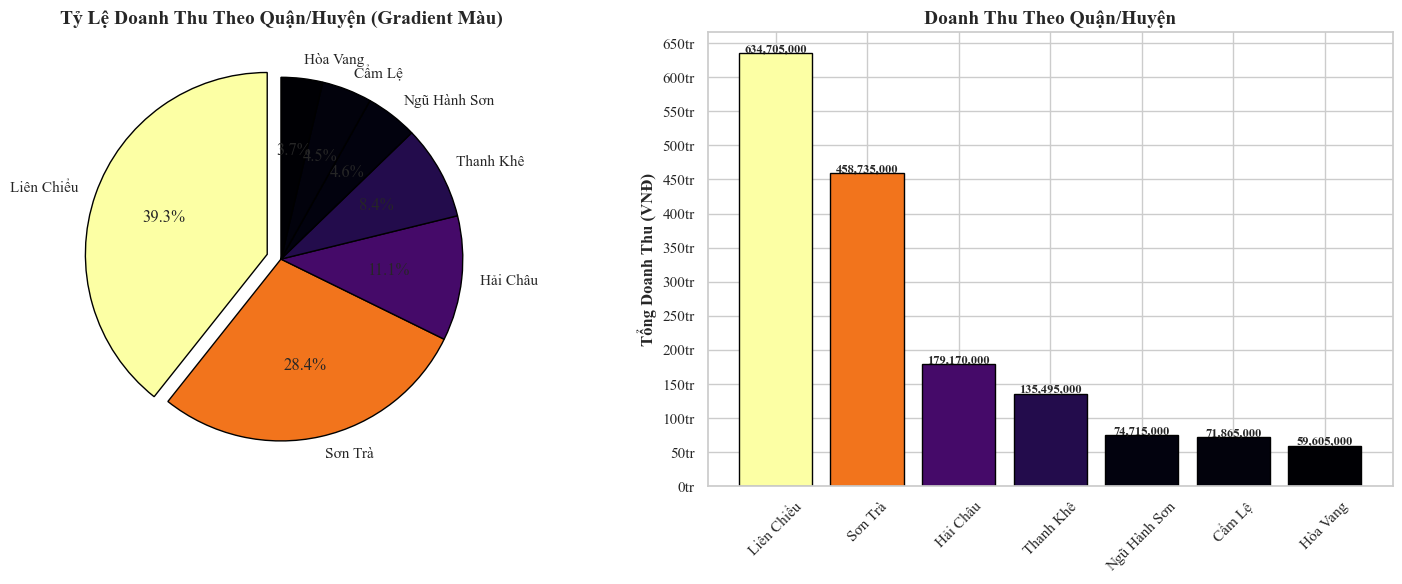

In [ ]:
# Tính tổng doanh thu theo Quận/Huyện
revenue_by_district = df_unique.groupby('Quận/Huyện')['total'].sum().sort_values(ascending=False)

# Normalize giá trị → màu
norm = plt.Normalize(revenue_by_district.min(), revenue_by_district.max())
colors3 = cm.inferno(norm(revenue_by_district.values))  # Tông màu Inferno (ấm và mạnh mẽ)

# Tạo figure và hai trục (axes)
fig, ax = plt.subplots(figsize=(15, 6), ncols=2, nrows=1)

# Tạo giá trị explode (tách rời phần lớn nhất)
explode = [0.08 if v == max(revenue_by_district.values) else 0 for v in revenue_by_district.values]

# Biểu đồ tròn với gradient màu và quay 90 độ
ax[0].pie(
    revenue_by_district.values, 
    labels=revenue_by_district.index,
    autopct='%1.1f%%',
    startangle=90,  # Quay 90 độ
    explode=explode,
    colors=colors3,
    wedgeprops={'edgecolor': 'black'}
)
ax[0].set_title("Tỷ Lệ Doanh Thu Theo Quận/Huyện (Gradient Màu)", fontsize=14, fontweight='bold')

# Biểu đồ cột cùng màu
total_province_bar = ax[1].bar(
    revenue_by_district.index, 
    revenue_by_district.values, 
    color=colors3,
    edgecolor='black'
)
ax[1].set_title("Doanh Thu Theo Quận/Huyện", fontsize=14, fontweight='bold')
ax[1].set_ylabel("Tổng Doanh Thu (VNĐ)", fontsize=12, fontweight='bold')
ax[1].tick_params(axis='x', rotation=45)
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(50_000_000))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f}tr"))

# Hiển thị giá trị trên mỗi cột
for bar in total_province_bar:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, height + 1000000, f'{height:,.0f}', ha='center', fontsize=9, fontweight='bold')

# Căn chỉnh layout để tránh bị chồng lấn
plt.tight_layout()
plt.show()

#### __DOANH THU THEO NGHỀ NGHIỆP NGÀNH, NHÓM TUỔI__

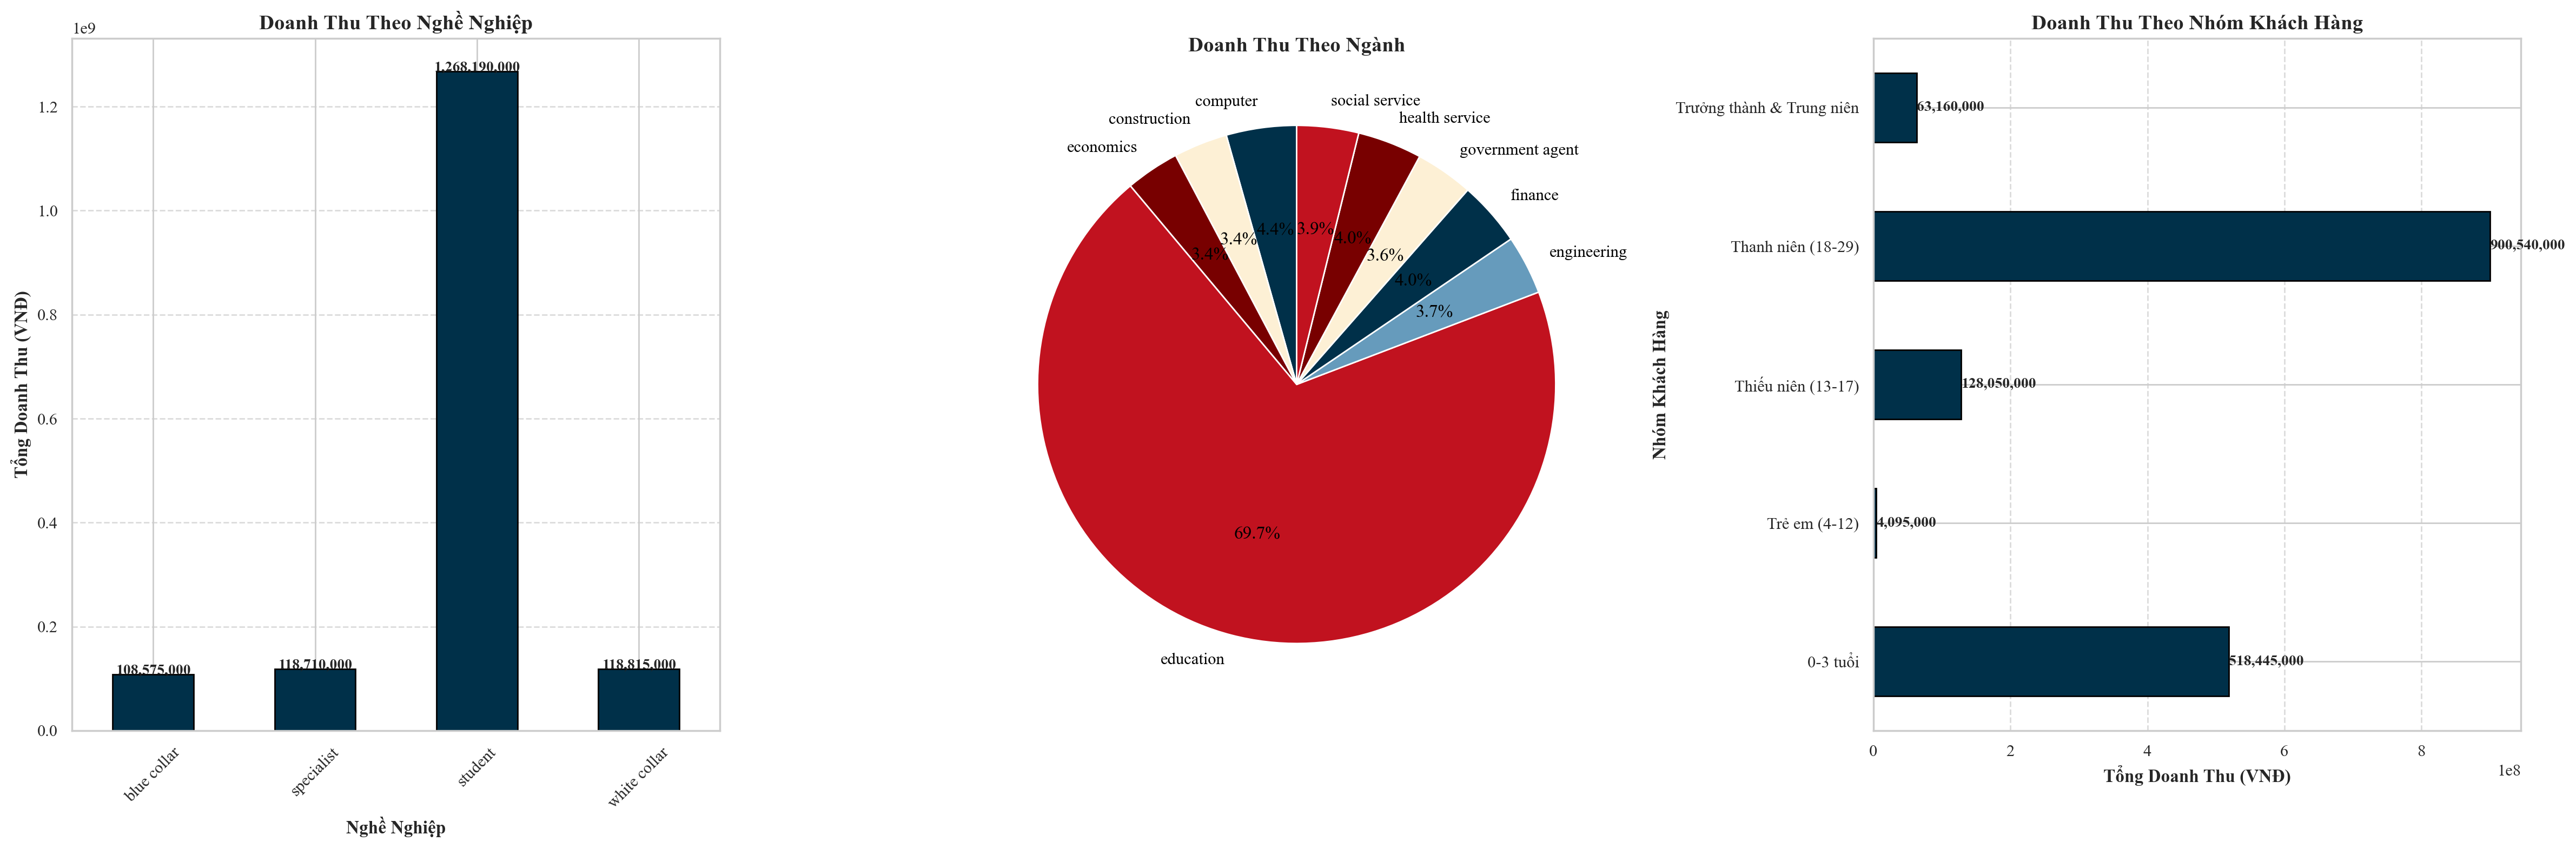

In [ ]:
# Tính doanh thu theo Nghề nghiệp
revenue_by_job = df_unique.groupby('job')['total'].sum()

# Tính doanh thu theo Ngành
revenue_by_industry = df_unique.groupby('industry')['total'].sum()

# Tính doanh thu theo Nhóm khách hàng
revenue_by_age_group = df_unique.groupby('Age Group')['total'].sum()

# Tạo subplots (3 biểu đồ trong một hàng)
fig, axs = plt.subplots(1, 3, figsize=(24, 8), dpi=200)

# Biểu đồ doanh thu theo Nghề nghiệp (Bar Chart)
revenue_by_job.plot(kind='bar', ax=axs[0], color='#003049', edgecolor='black')
axs[0].set_title('Doanh Thu Theo Nghề Nghiệp', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Nghề Nghiệp', fontsize=12, fontweight='bold')
axs[0].set_ylabel('Tổng Doanh Thu (VNĐ)', fontsize=12, fontweight='bold')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị doanh thu trong biểu đồ Nghề nghiệp
for i, v in enumerate(revenue_by_job):
    axs[0].text(i, v + 5000, f'{v:,.0f}', ha='center', fontsize=10, fontweight='bold')

# Biểu đồ doanh thu theo Ngành (Pie Chart)
axs[1].pie(revenue_by_industry, labels=revenue_by_industry.index, autopct='%1.1f%%',
          startangle=90, colors=['#003049', '#FDF0D5','#780000','#C1121F','#669BBC'], textprops={'color': 'black'})
axs[1].set_title('Doanh Thu Theo Ngành', fontsize=14, fontweight='bold')

# Biểu đồ doanh thu theo Nhóm khách hàng (Horizontal Bar Chart)
revenue_by_age_group.plot(kind='barh', ax=axs[2], color='#003049', edgecolor='black')
axs[2].set_title('Doanh Thu Theo Nhóm Khách Hàng', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Tổng Doanh Thu (VNĐ)', fontsize=12, fontweight='bold')
axs[2].set_ylabel('Nhóm Khách Hàng', fontsize=12, fontweight='bold')
axs[2].tick_params(axis='y', rotation=0)
axs[2].grid(axis='x', linestyle='--', alpha=0.7)

# Hiển thị giá trị doanh thu trong biểu đồ Nhóm khách hàng
for i, v in enumerate(revenue_by_age_group):
    axs[2].text(v + 5000, i, f'{v:,.0f}', va='center', fontsize=10, fontweight='bold')

# Tạo layout đẹp
plt.tight_layout()
plt.show()


#### __DOANH THU THEO NHÓM TUỔI VÀ GIỚI TÍNH__

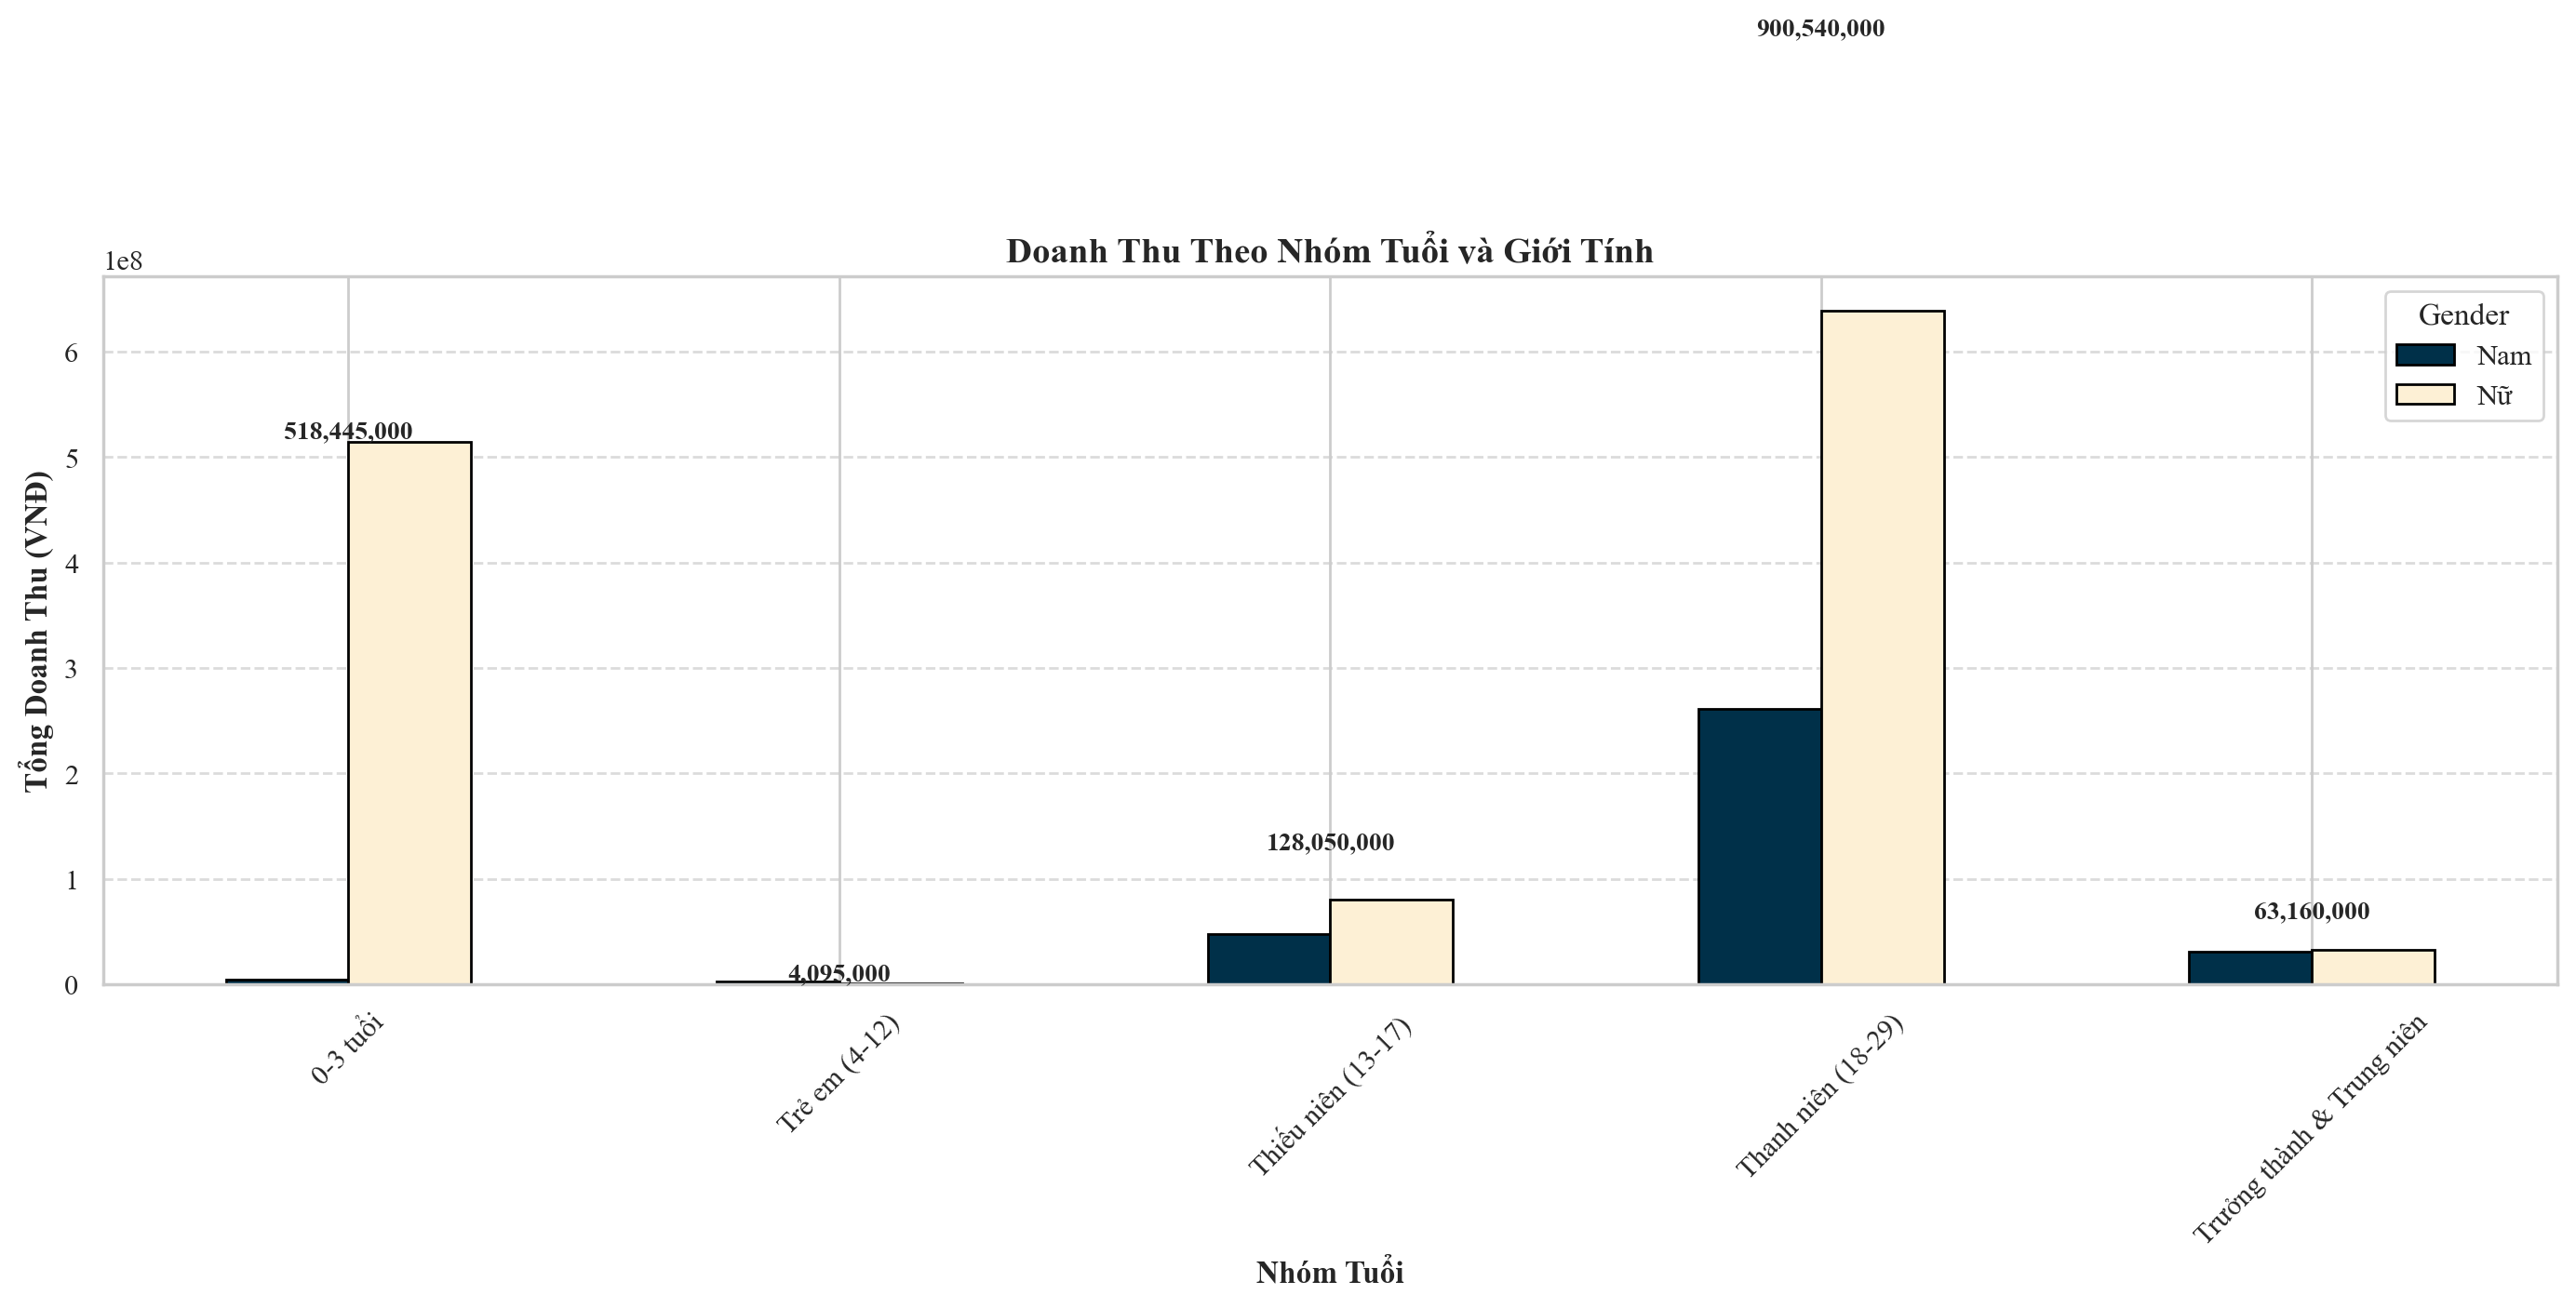

In [ ]:
# Tính doanh thu theo Nhóm Tuổi và Giới Tính
revenue_by_age_gender = df_unique.groupby(['Age Group', 'Gender'])['total'].sum().unstack()

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(14, 8), dpi=200)

# Vẽ biểu đồ cột cho doanh thu của Nam và Nữ trong từng nhóm tuổi
revenue_by_age_gender.plot(kind='bar', ax=ax, color=['#003049', '#FDF0D5'], edgecolor='black')

# Tiêu đề và thông số
ax.set_title('Doanh Thu Theo Nhóm Tuổi và Giới Tính', fontsize=14, fontweight='bold')
ax.set_xlabel('Nhóm Tuổi', fontsize=12, fontweight='bold')
ax.set_ylabel('Tổng Doanh Thu (VNĐ)', fontsize=12, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị doanh thu lên từng cột
for i, v in enumerate(revenue_by_age_gender.sum(axis=1)):
    ax.text(i, v + 5000, f'{v:,.0f}', ha='center', fontsize=10, fontweight='bold')

# Tạo layout đẹp
plt.tight_layout()
plt.show()


#### __DOANH THU THEO PHIM, QUỐC GIA__

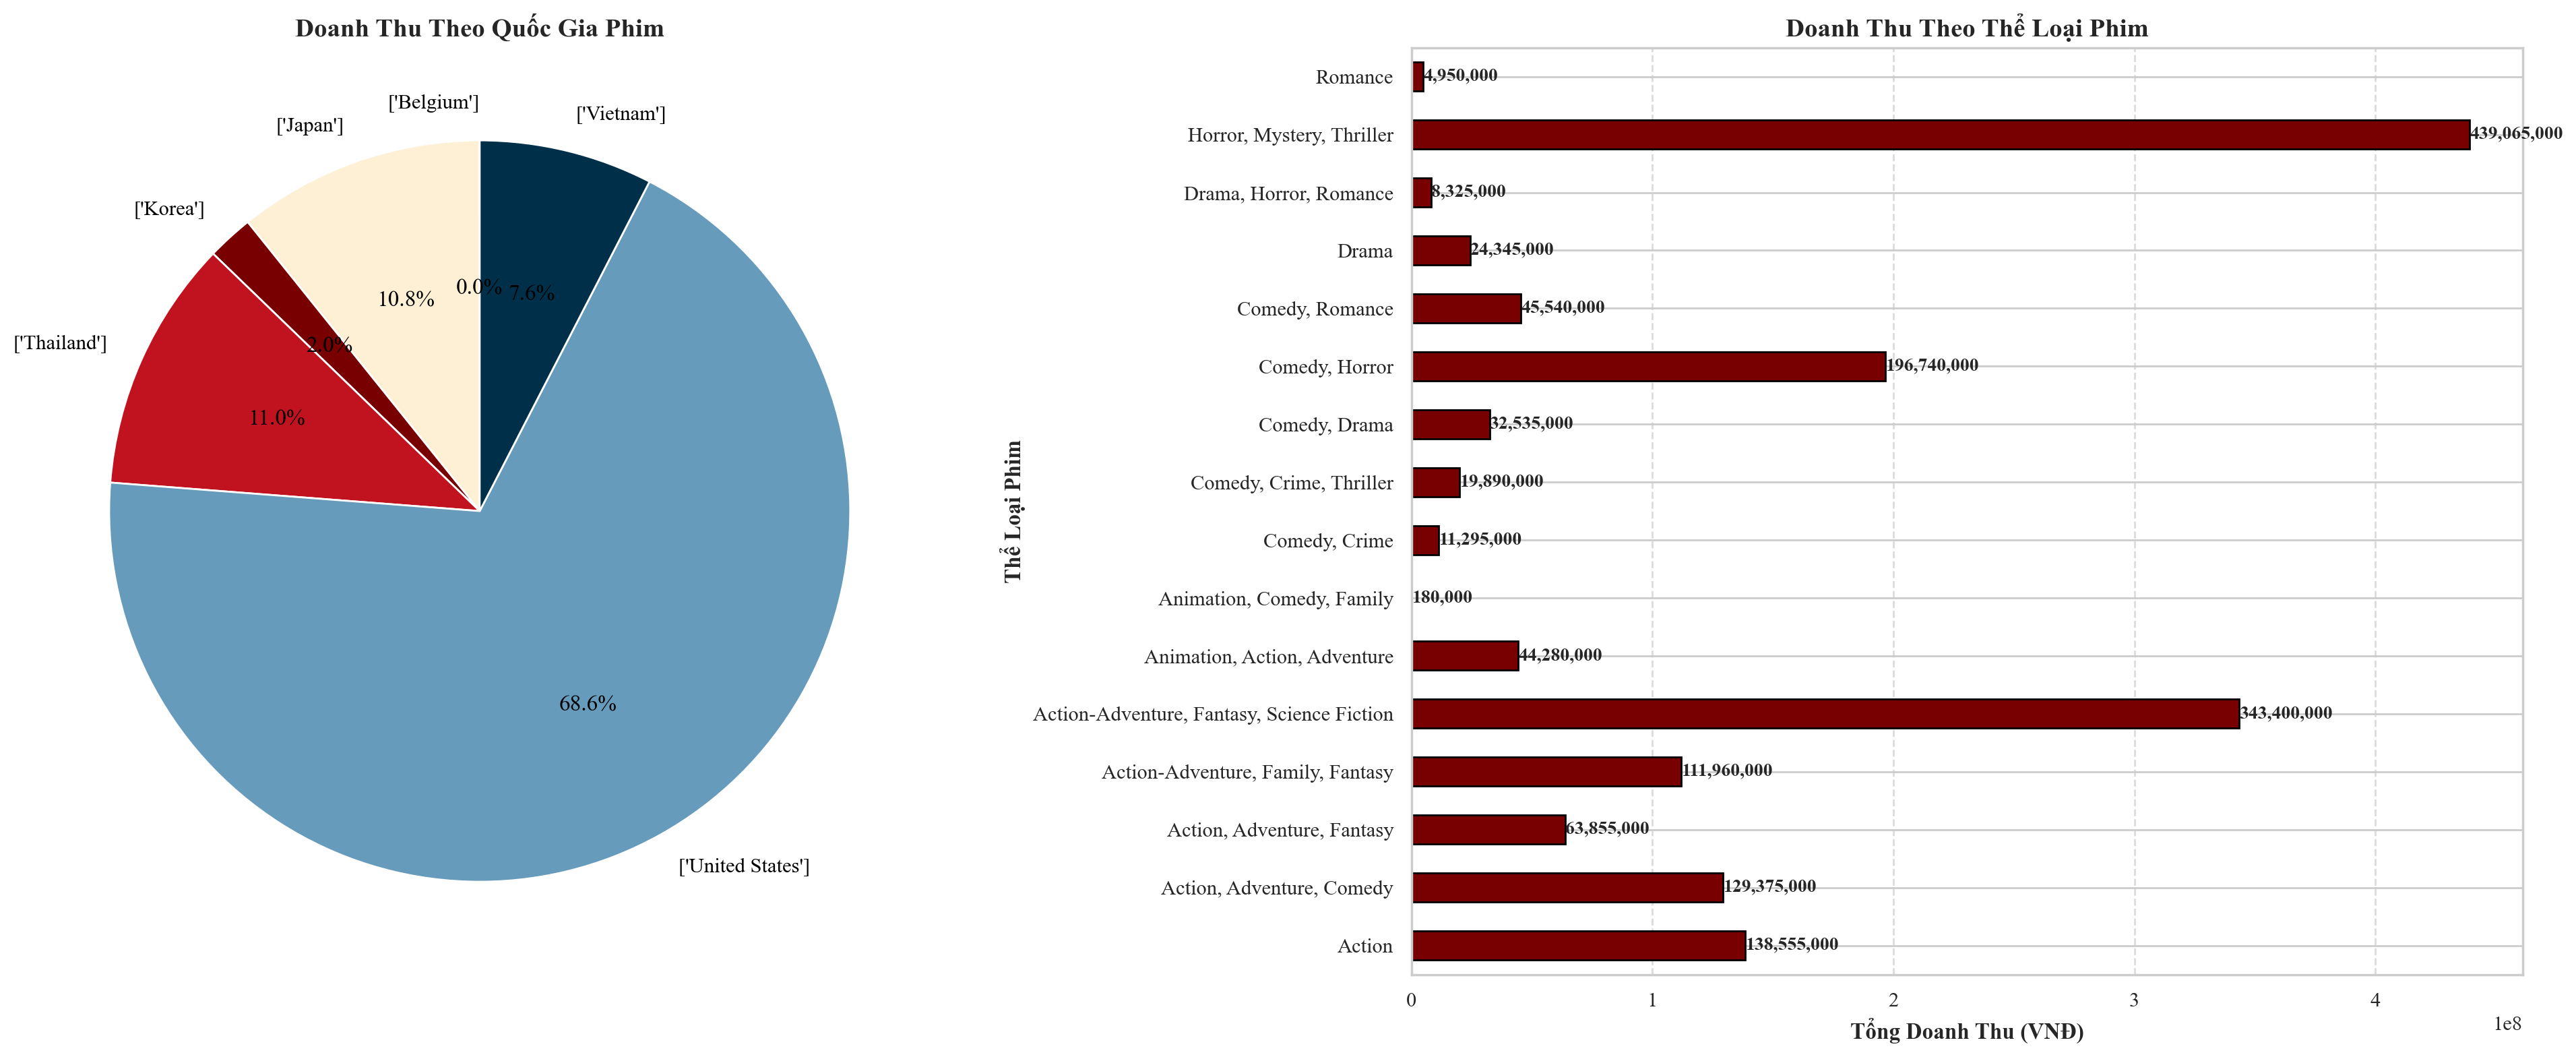

In [ ]:
# Kiểm tra dữ liệu trong cột 'Genre' và 'Country' để đảm bảo không phải là danh sách
df_unique['Genre'] = df_unique['listed_in'].astype(str)
df_unique['Country'] = df_unique['country'].astype(str)

# Tính doanh thu theo thể loại phim
revenue_by_genre = df_unique.groupby('Genre')['total'].sum()

# Tính doanh thu theo quốc gia phim
revenue_by_country = df_unique.groupby('Country')['total'].sum()

# Tạo subplots (2 biểu đồ trong một hàng)
fig, axs = plt.subplots(1, 2, figsize=(20, 8), dpi=200)

# Biểu đồ doanh thu theo quốc gia phim (Pie Chart)
axs[0].pie(revenue_by_country, labels=revenue_by_country.index, autopct='%1.1f%%',
          startangle=90, colors=['#003049', '#FDF0D5','#780000','#C1121F','#669BBC'], textprops={'color': 'black'})
axs[0].set_title('Doanh Thu Theo Quốc Gia Phim', fontsize=14, fontweight='bold')

# Biểu đồ doanh thu theo thể loại phim (Horizontal Bar Chart)
revenue_by_genre.plot(kind='barh', ax=axs[1], color='#780000', edgecolor='black')
axs[1].set_title('Doanh Thu Theo Thể Loại Phim', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Tổng Doanh Thu (VNĐ)', fontsize=12, fontweight='bold')
axs[1].set_ylabel('Thể Loại Phim', fontsize=12, fontweight='bold')
axs[1].tick_params(axis='y', rotation=0)
axs[1].grid(axis='x', linestyle='--', alpha=0.7)

# Hiển thị giá trị doanh thu trong biểu đồ thể loại phim
for i, v in enumerate(revenue_by_genre):
    axs[1].text(v + 5000, i, f'{v:,.0f}', va='center', fontsize=10, fontweight='bold')

# Tạo layout đẹp
plt.tight_layout()
plt.show()


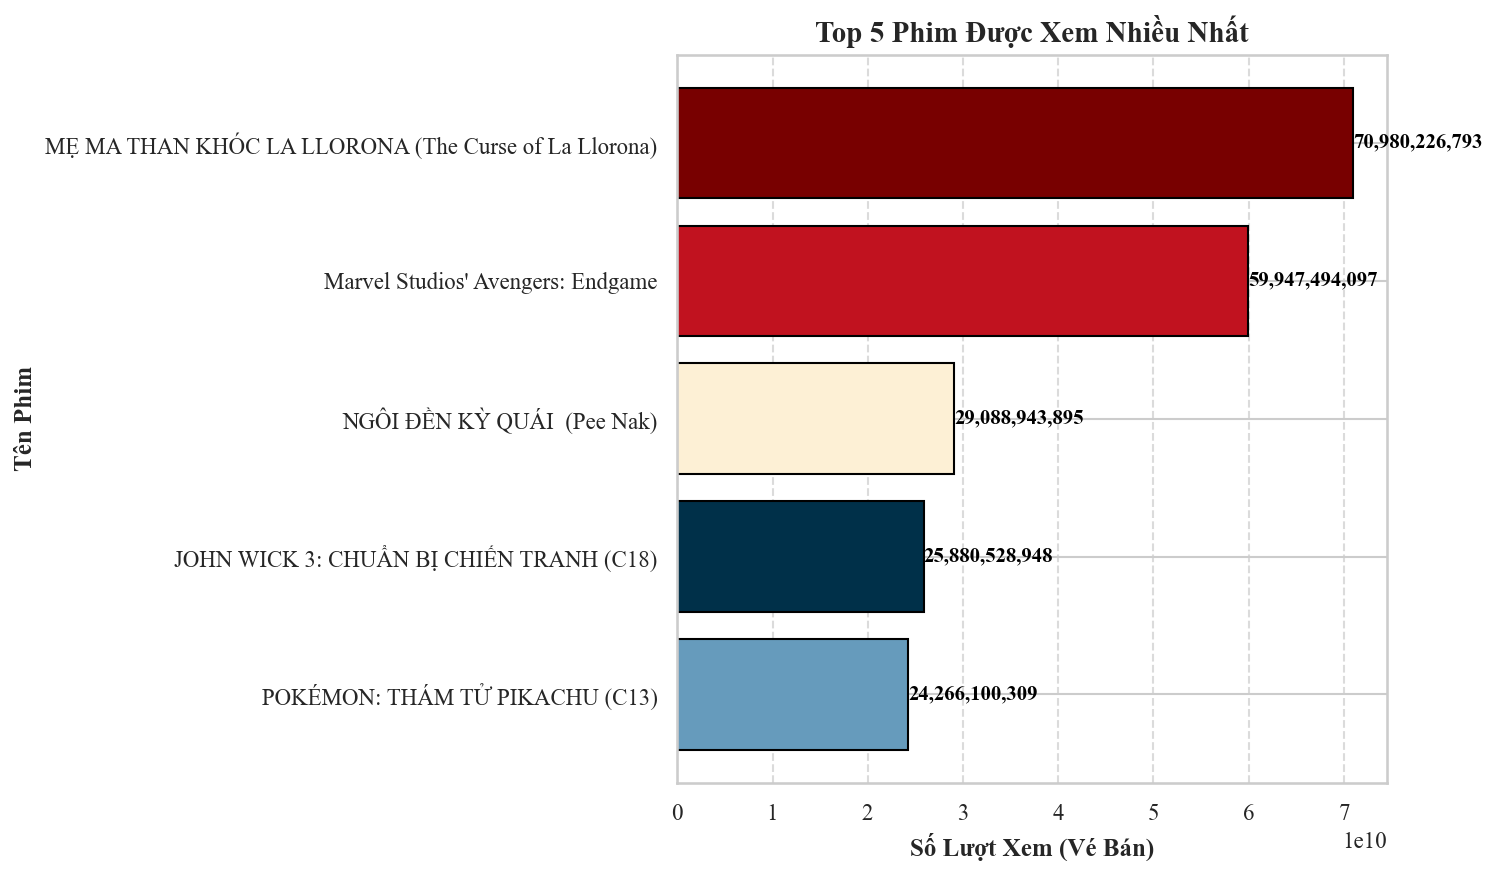

In [ ]:
# Lấy Top 5 phim có số lượt xem cao nhất
top5_movies = df_unique.groupby('title')['ticketcode'].sum().sort_values(ascending=False).head(5)

# Tạo bảng màu tùy chỉnh
palette = ["#780000", "#C1121F", "#FDF0D5", "#003049", "#669BBC"]

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

# Vẽ biểu đồ cột ngang với màu sắc riêng cho từng cột
bars = ax.barh(top5_movies.index[::-1], top5_movies.values[::-1], 
               color=palette[::-1], edgecolor='black')

# Tiêu đề và nhãn
ax.set_title('Top 5 Phim Được Xem Nhiều Nhất', fontsize=14, fontweight='bold')
ax.set_xlabel('Số Lượt Xem (Vé Bán)', fontsize=12, fontweight='bold')
ax.set_ylabel('Tên Phim', fontsize=12, fontweight='bold')
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Hiển thị giá trị lượt xem trên mỗi cột
for i, v in enumerate(top5_movies.values[::-1]):
    ax.text(v + 100, i, f'{v:,}', va='center', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

#### __DOANH THU THEO LOẠI GHẾ NGỒI__

In [ ]:
total_slot_type = df_unique.groupby('slot type')['total'].sum()

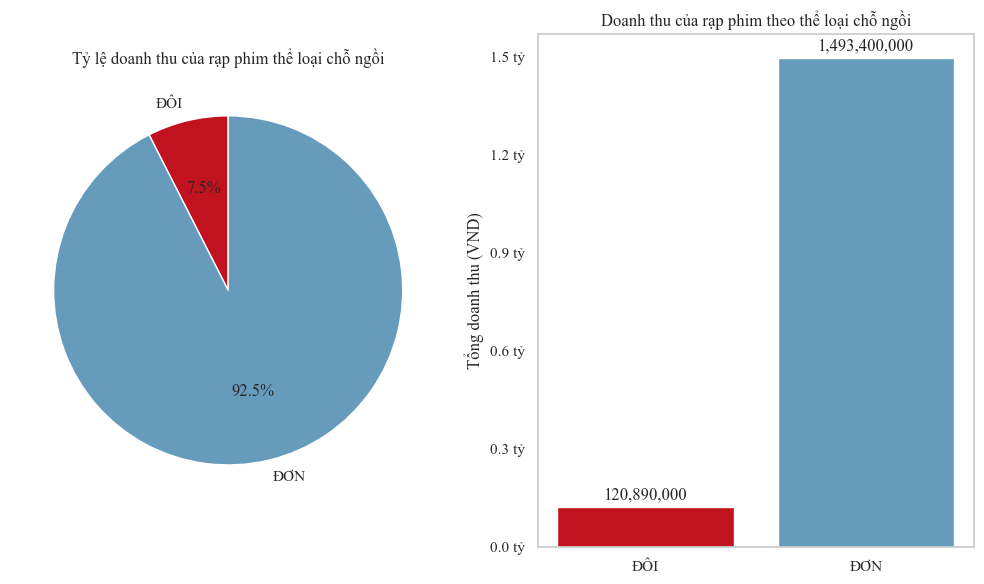

In [ ]:
colors = ['#C1121F', '#669BBC']

fig, ax = plt.subplots(figsize=(10, 6), ncols=2)

# Pie chart với custom màu
ax[0].pie(
    total_slot_type.values,
    labels=total_slot_type.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
ax[0].set_title("Tỷ lệ doanh thu của rạp phim thể loại chỗ ngồi")

# Bar chart với cùng màu
total_slot_type_bar = ax[1].bar(
    total_slot_type.index,
    total_slot_type.values,
    color=colors
)
ax[1].set_title("Doanh thu của rạp phim theo thể loại chỗ ngồi")
ax[1].set_ylabel("Tổng doanh thu (VND)")

# Thiết lập định dạng trục y
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(300_000_000))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e9:.1f} tỷ"))

# Hiển thị số tiền trên cột
ax[1].bar_label(
    total_slot_type_bar,
    labels=[f"{v:,}" for v in total_slot_type.values],
    padding=3
)

# Loại bỏ grid
ax[1].grid(False)

plt.tight_layout()
plt.show()